In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import openpyxl
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
df = pd.read_csv('data.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [3]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [4]:
df['class'] = df['Diabetes_012']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df['class'] = df['class'].replace({ 2 : 1})

In [6]:
df['class'].value_counts()

class
0.0    213703
1.0     39977
Name: count, dtype: int64

In [9]:
df = df.drop(columns=['Diabetes_012'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  NoDocbcCost           253680 non-null  float64
 13  GenHlth               253680 non-null  float64
 14  MentHlth              253680 non-null  float64
 15  

In [16]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,class
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.157588
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.364355
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [19]:
df['class'].value_counts()

class
0.0    213703
1.0     39977
Name: count, dtype: int64

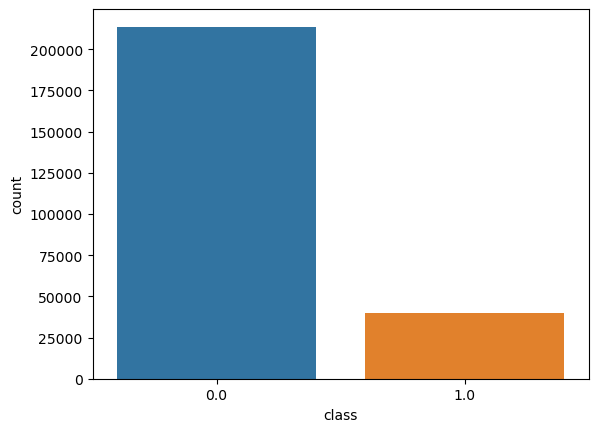

In [18]:
sns.countplot(x=df['class']);

In [20]:
corr = df.corr()
corr.style.background_gradient(cmap='RdBu_r').format(precision=2)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,class
HighBP,1.00,0.30,0.10,0.21,0.10,0.13,0.21,-0.13,-0.04,-0.06,-0.00,0.04,0.02,0.30,0.06,0.16,0.22,0.05,0.34,-0.14,-0.17,0.27
HighChol,0.30,1.00,0.09,0.11,0.09,0.09,0.18,-0.08,-0.04,-0.04,-0.01,0.04,0.01,0.21,0.06,0.12,0.14,0.03,0.27,-0.07,-0.09,0.21
CholCheck,0.10,0.09,1.00,0.03,-0.01,0.02,0.04,0.00,0.02,0.01,-0.02,0.12,-0.06,0.05,-0.01,0.03,0.04,-0.02,0.09,0.00,0.01,0.07
BMI,0.21,0.11,0.03,1.00,0.01,0.02,0.05,-0.15,-0.09,-0.06,-0.05,-0.02,0.06,0.24,0.09,0.12,0.20,0.04,-0.04,-0.10,-0.10,0.22
Smoker,0.10,0.09,-0.01,0.01,1.00,0.06,0.11,-0.09,-0.08,-0.03,0.10,-0.02,0.05,0.16,0.09,0.12,0.12,0.09,0.12,-0.16,-0.12,0.06
Stroke,0.13,0.09,0.02,0.02,0.06,1.00,0.20,-0.07,-0.01,-0.04,-0.02,0.01,0.03,0.18,0.07,0.15,0.18,0.00,0.13,-0.08,-0.13,0.10
HeartDiseaseorAttack,0.21,0.18,0.04,0.05,0.11,0.20,1.00,-0.09,-0.02,-0.04,-0.03,0.02,0.03,0.26,0.06,0.18,0.21,0.09,0.22,-0.10,-0.14,0.18
PhysActivity,-0.13,-0.08,0.00,-0.15,-0.09,-0.07,-0.09,1.00,0.14,0.15,0.01,0.04,-0.06,-0.27,-0.13,-0.22,-0.25,0.03,-0.09,0.20,0.20,-0.12
Fruits,-0.04,-0.04,0.02,-0.09,-0.08,-0.01,-0.02,0.14,1.00,0.25,-0.04,0.03,-0.04,-0.10,-0.07,-0.04,-0.05,-0.09,0.06,0.11,0.08,-0.04
Veggies,-0.06,-0.04,0.01,-0.06,-0.03,-0.04,-0.04,0.15,0.25,1.00,0.02,0.03,-0.03,-0.12,-0.06,-0.06,-0.08,-0.06,-0.01,0.15,0.15,-0.06


In [44]:
for col in df.columns:
    #print(col, len(df[col].value_counts()))
    if len(df[col].value_counts()) > 2:
        print('Variable:', col)

Variable: BMI
Variable: GenHlth
Variable: MentHlth
Variable: PhysHlth
Variable: Age
Variable: Education
Variable: Income


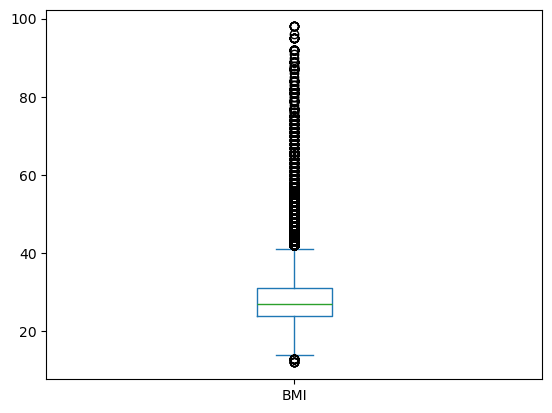

In [48]:
df['BMI'].plot(kind='box');

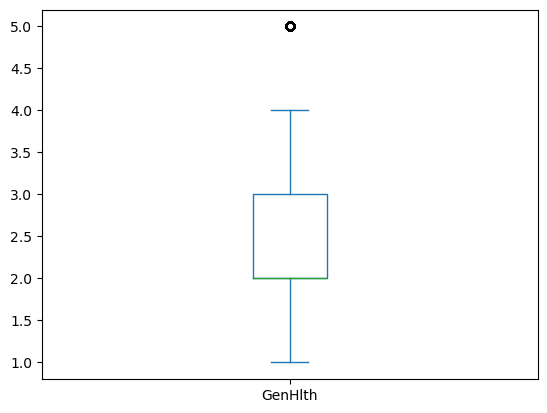

In [45]:
df['GenHlth'].plot(kind='box');

<Axes: >

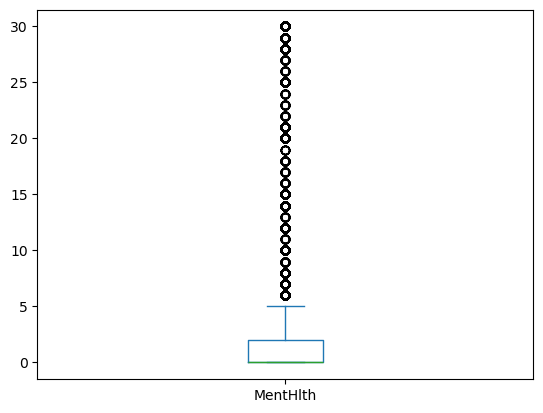

In [49]:
df['MentHlth'].plot(kind='box');

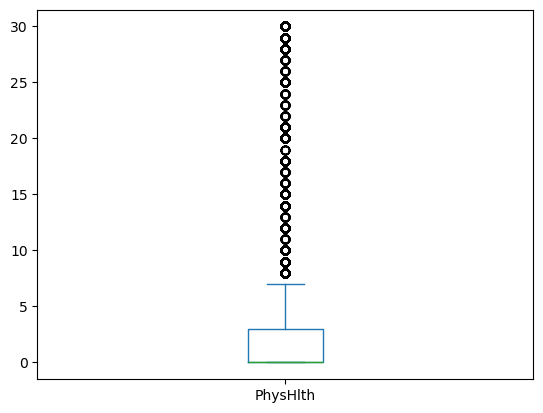

In [50]:
df['PhysHlth'].plot(kind='box');

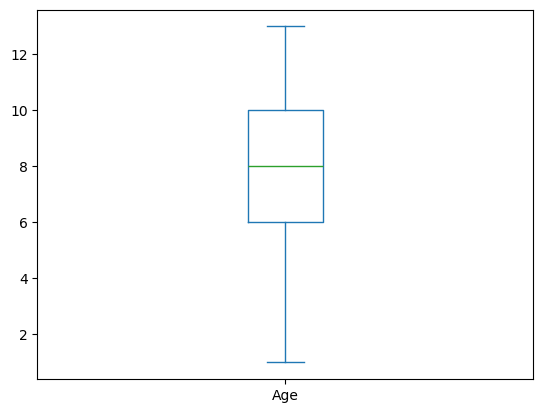

In [51]:
df['Age'].plot(kind='box');

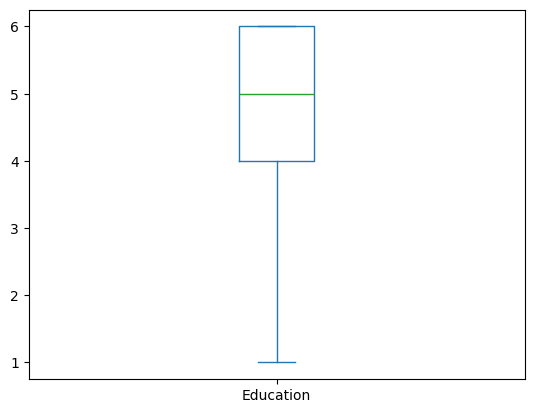

In [52]:
df['Education'].plot(kind='box');

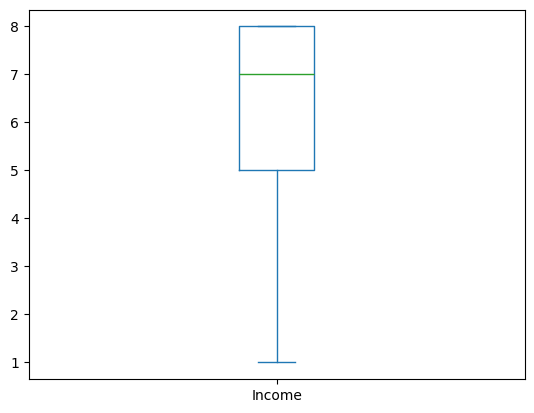

In [53]:
df['Income'].plot(kind='box');

In [12]:
#Downsampling

# Separate majority and minority classes
df_majority = df[ df["class"] == 0 ]
df_minority = df[ df["class"] == 1 ]

# Downsample majority class
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),  # to match minority class
                                   random_state=42)  # for reproducibility

# Combine minority class with downsampled majority class
dfs = pd.concat([df_majority_downsampled, df_minority])

In [13]:
X = dfs.drop("class",axis= 1)
y = dfs["class"]

In [14]:
# Pipeline with Imputer, Scaler and Feature selection

pipe = Pipeline([
    ("Imputer",SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k=20))  # Select the top 20 features
    ])

pipe.fit(X,y)

Pipeline(steps=[('Imputer', SimpleImputer()), ('std_scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=20))])

In [15]:
# Get the k-best features
feature_names = X.columns
selected_features = pipe.named_steps['feature_selection'].get_support(indices=True)
k_best_feature_names = [ feature_names[i] for i in selected_features]
# Print the k-best features
k_best_feature_names

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Income']

In [74]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Initialize model
model = LogisticRegression(max_iter=200, random_state=0)

# Initialize RFE
rfe = RFE(model, n_features_to_select=1)
fit = rfe.fit(X, y)

# Print selected features
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


c:\Users\akonomos\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\akonomos\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

Num Features: 1
Selected Features: [ True False False False False False False False False False False False
 False False False False False False False False False]
Feature Ranking: [ 1  4  2 11 17  7  6 16 13 15  3 19 14  5 21 20 18  8  9 12 10]


In [76]:
# Creating a DataFrame to view the feature ranking
feature_ranking_df = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': fit.ranking_
}).sort_values(by='Ranking')

print(feature_ranking_df)

                 Feature  Ranking
0                 HighBP        1
2              CholCheck        2
10     HvyAlcoholConsump        3
1               HighChol        4
13               GenHlth        5
6   HeartDiseaseorAttack        6
5                 Stroke        7
17                   Sex        8
18                   Age        9
20                Income       10
3                    BMI       11
19             Education       12
8                 Fruits       13
12           NoDocbcCost       14
9                Veggies       15
7           PhysActivity       16
4                 Smoker       17
16              DiffWalk       18
11         AnyHealthcare       19
15              PhysHlth       20
14              MentHlth       21


In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Initialize model
model = LogisticRegression(max_iter=200, random_state=0)

# Initialize RFE
rfe = RFE(model, n_features_to_select=len(X.columns))
fit = rfe.fit(X, y)

# Print selected features
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 21
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


c:\Users\akonomos\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
# Retrieving the coefficients of the selected features
selected_features = [feature_names[i] for i in range(len(feature_names)) if fit.support_[i]]
selected_coefficients = fit.estimator_.coef_

# Creating a DataFrame to display the coefficients of the selected features
coefficients_df = pd.DataFrame(selected_coefficients.T, index=selected_features, columns=['Coefficient'])
print(coefficients_df)

                      Coefficient
HighBP                   0.701626
HighChol                 0.580452
CholCheck                1.100430
BMI                      0.076815
Smoker                   0.019263
Stroke                   0.151783
HeartDiseaseorAttack     0.285090
PhysActivity            -0.027644
Fruits                  -0.037853
Veggies                 -0.033716
HvyAlcoholConsump       -0.628458
AnyHealthcare            0.109254
NoDocbcCost              0.080205
GenHlth                  0.540232
MentHlth                -0.003481
PhysHlth                -0.006185
DiffWalk                 0.058299
Sex                      0.249551
Age                      0.147960
Education               -0.046299
Income                  -0.065586


In [98]:
coefficients_df = coefficients_df.reset_index()

In [103]:
coefficients_df['Feature'] = coefficients_df['index']
coefficients_df = coefficients_df.drop(columns='index')

In [90]:
feature_ranking_df.reset_index()

,index,Feature,Ranking
0,0,HighBP,1
1,2,CholCheck,2
2,10,HvyAlcoholConsump,3
3,1,HighChol,4
4,13,GenHlth,5
5,6,HeartDiseaseorAttack,6
6,5,Stroke,7
7,17,Sex,8
8,18,Age,9
9,20,Income,10


In [108]:
inner_join_df = pd.merge(feature_ranking_df, coefficients_df, on='Feature', how='inner')
inner_join_df

,Feature,Ranking,Coefficient
0,HighBP,1,0.701626
1,CholCheck,2,1.100430
2,HvyAlcoholConsump,3,-0.628458
3,HighChol,4,0.580452
4,GenHlth,5,0.540232
5,HeartDiseaseorAttack,6,0.285090
6,Stroke,7,0.151783
7,Sex,8,0.249551
8,Age,9,0.147960
9,Income,10,-0.065586


In [109]:
import statsmodels.api as sm

In [110]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out=0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns:
        list of selected features 
    """
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        # use all coefs except the intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break

    return included

In [111]:
# Perform stepwise selection
result = stepwise_selection(X, y)

print('Selected features:', result)

# Fit the final logistic regression model with the selected features
model = sm.Logit(y, sm.add_constant(X[result])).fit()
print(model.summary())

Add  Education                      with p-value 0.0
Add  HeartDiseaseorAttack           with p-value 0.0
Add  HighChol                       with p-value 0.0
Add  BMI                            with p-value 0.0
Add  HighBP                         with p-value 0.0
Add  GenHlth                        with p-value 0.0
Add  Age                            with p-value 0.0
Add  CholCheck                      with p-value 5.50934e-61
Add  HvyAlcoholConsump              with p-value 4.35055e-49
Add  Sex                            with p-value 3.83124e-35
Add  Income                         with p-value 2.73562e-49
Add  PhysHlth                       with p-value 7.34141e-08
Add  Stroke                         with p-value 7.95176e-05
Selected features: ['Education', 'HeartDiseaseorAttack', 'HighChol', 'BMI', 'HighBP', 'GenHlth', 'Age', 'CholCheck', 'HvyAlcoholConsump', 'Sex', 'Income', 'PhysHlth', 'Stroke']
Optimization terminated successfully.
         Current function value: 0.521212
      